# **ECS7020P Mini-Project**

### **Basic Component**

### **Author:** Sayali Vijay Ghodke
### **Student ID:** 230692620

## **Problem Formulation**

In this problem statement, we predict whether an image from the **MLEnd Yummy** Dataset that has various dishes in it, is having **Rice** in it or having **Chips** in it. We will be developing a prediction model that will classify our images as **Rice** or **Chips** based on image classification.

This problem is interesting as we can use it in real world applications that use food image processing. This type of problem will help people understand the difference between two or more food items that can be visibly difficult to distinguish. Here, we will be dealing with images that has different compositions and presentation techniques and also few unrelated backgrounds. This is a challenge to overcome these components.

## Machine Learning Pipline:

### 1. Input Format:

We are having various images in JPEG format, which is having various types of dishes from different cusines. As we need to classify only two different dishes that are rice and chips, we have a seperate dataset which has either rice or chips in it and it is called **MLEnd Small Yummy** Dataset. We also have a attibute table which has columns as **filename** (which is nothing but the names of the images), **Dish_name** (which contains names of the dishes that corresponds to the image), **Home_restaurant** (which states whether the corresponding dish is made at home or any restaurant, who's name is specified), **Cuisine** (this columns contains the name of the country in which the corresponding dish is a speciality), **Ingredients** (it contains the basic ingredients that are used to make that specific dish), **Diet** (this column is a drop down option which has three options, Vegetarian, Non-vegetarian,
or Vegan), **Healthiness_rating** (this column is also drop down option which has, Very healthy, Healthy, Neutral, Unhealthy, Very unhealthy, which will decribe the healthyness of the dish), **How_much_did_you_like_it** (this is also a drop down column which will tell us about the likelihood of that dish based on a random person and it has, Strongly like, Like, Neutral, Dislike, Strongly Dislike), **Rice_Chips** (this is the column where we have specified whether the image is of Rice or Chips) and **Benchmark_A** (in this column we have determined whether the specific image is taken for training or testing).

We have now described the images we have considered in order to design the prediction model.

### 2. Preprocessing:

Let us now load the dataset:
        In order to load the dataset, we will make use of **google colab** and **google drive**. We will first make sure that we can access our google drive through google colab. To do so, we first created a seperate folder in our drive, and in that created another folder named **'Data'**, again created a folder inside **'Data'**, named **MLEnd**, and then we install the library **mlend** as below.

In [2]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.1 MB/s eta 0:00:00


Now, we will load the dataset. In order to do so, we will use different libraries and modules from **python**, and then mount our **google drive**.

In [3]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


We have our small sample of dataset which only contains either **Rice** or **Chips**. Let us download it.

In [4]:
baseDir = download_yummy_small(save_to = '/content/drive/MyDrive/Data/MLEnd')
baseDir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|99\99|00099.jpg
Done!


'/content/drive/MyDrive/Data/MLEnd/yummy'

Here, we are using **download_yummy_small** function to download the **MLEnd Small Yummy** Dataset. We have also saved it in a different directory.

Our attributes of the dataset are text based, which is why we will be creating a CSV file to store those attributes. We will not be storing the image attribute in this file as it is complex to be stored in such a file. So, we store the images in a different folder, but the filename of each image is still stored in the CSV file as a link to that image.

In [5]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv').set_index('filename')
MLENDYD_df

,Dish_name,Home_restaurant,Cuisine,Ingredients,Diet,Healthiness_rating,How_much_did_you_like_it,Rice_Chips,Benchmark_A
filename,,,,,,,,,
00001.jpg,steak_&_fries,resturaunt,american,"steak,fries,mixed_salad",non-veg,neutral,strongly_like,chips,Test
00002.jpg,beef_burger_meal,restaurant,american,"chips,burger,chicken_nugget",non-veg,unhealthy,like,chips,Train
00003.jpg,chicken_burger_with_fries_and_wings,restaurant,american,"fried_chicken_breast,lettuce,ketchup,sesame_se...",non-veg,unhealthy,like,chips,Train
00004.jpg,fried_rice_with_curd,home,indian,"rice,onion,potato,tomato,olive_oil,curd",vegetarian,neutral,like,rice,Train
00005.jpg,fish_and_chips,tcr_bar,british,"cod,beer,flour,tartare_sauce,peas,oil",vegetarian,neutral,strongly_like,chips,Test
...,...,...,...,...,...,...,...,...,...
00095.jpg,breaded_chicken_with_katsu_curry_sauce_rice_&_...,the_curve,japanese,"chicken,curry,rice,greens,bell_pepper",non-veg,healthy,strongly_like,rice,Train
00096.jpg,chicken_wrap_with_fries,roosters_piri_piri,portuguese,"tortilla_wrap,chicken,olive_oil,piri_piri_sauc...",non-veg,healthy,strongly_like,chips,Train
00097.jpg,butter_chicken,restaurant,indian,"garlic,tomato,onion,white_rice,naan_bread,cash...",non-veg,neutral,like,rice,Train


Above are the contents of the CSV file. We can see that there are 99 rows and 9 columns in our dataset, however, the column **'filename'** acts as index and link to the image of the dish, which is why we have 10 columns. As we have already discussed that we have column **'Benchmark_A'** in which we have determined whether the specific image is taken for training or testing, using this column let us divide the dataset into two different datasets, i.e. training and testing datasets. We will make the use of **yummy_small_load** function.

In [6]:
TrainSet, TestSet, Map = yummy_small_load(datadir_main=baseDir,train_test_split='Benchmark_A')

Total 99 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/


Let us now describe how the train and test datasets are mapped with **0** and **1** instead of rice and chips.

In [7]:
TrainSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [8]:
TestSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [9]:
Map

{'Rice_Chips': {'chips': 0, 'rice': 1}}

Let us look at the encoding of the **0** and **1** to the training dataset. This can also be known as Label Encoding

In [10]:
TrainSet['Y']

array(['chips', 'chips', 'rice', 'rice', 'rice', 'chips', 'rice', 'chips',
       'rice', 'chips', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'chips', 'chips', 'rice', 'rice', 'chips', 'rice', 'rice', 'rice',
       'rice', 'rice', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'rice', 'chips', 'chips', 'rice', 'chips', 'chips', 'chips',
       'chips', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'chips', 'chips', 'rice', 'rice', 'chips', 'chips', 'rice', 'rice',
       'rice', 'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'chips'],
      dtype=object)

In [11]:
TrainSet['Y_encoded']

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0])

Let us get different variables to store the lables and features of each dataset.

In [12]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

Let us look at first two images of the whole dataset.

(-0.5, 1207.5, 907.5, -0.5)

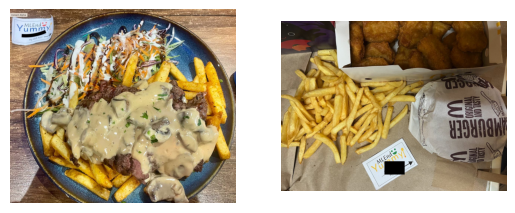

In [13]:
I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00002.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

They have different sizes. Let us resize them in a standard format, let us say 200x200.

In [14]:
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In the above code, the function **"make_it_square"**, **"I"** is the **3d** array which will represent all the images. The function just converts the array of images all together to a square shape. This will be done by adding the pad which is defined by **"np.pad"** function, to a small dimension. The **"N,M and C"** are nothing but the **"height, width and number of channels"** respectively. The function states that if the height is greater than the width, then there will be a padding on the right side of the image, which will eventually look like a square. On the other hand, if width is greater than height, the padding will be added to the other side of the image. The other function **"resize_image"** will resize the images.

We can see in the below cell that the images in the train and test sets are converted to the size of 200x200. It also plots the progress bar for us to know how many images have been transformed till that particular time.

In [15]:
X_train = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test.append(I)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, X_test.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!


((70, 200, 200, 3), (29, 200, 200, 3))

Now let us look at a few images.

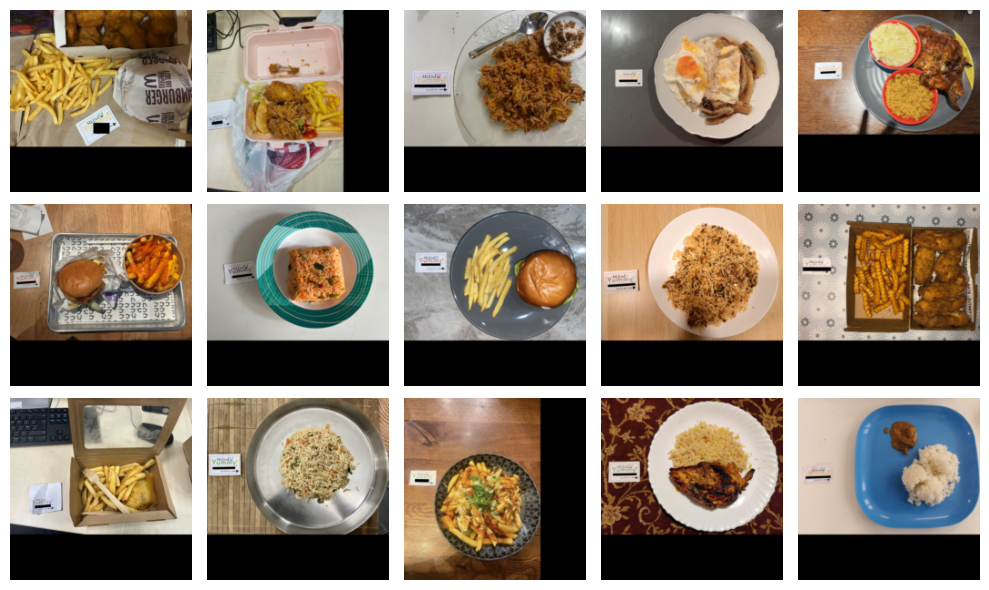

In [16]:
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

Now, you can see the padding is added to each of the images above. This was necessary as each of these images where not in the square format.

### 3. Feature Extraction OR Transformation Stage: Part One

In the feature extraction part, we will first implement the extraction, modelling and prediction of an image by using the extraction definitions of **Starter_Kit**.

If we try to design a model based on this 200x200 pixels of images, it will end up having a huge dimensionality of 3x200x200 which will result as 120000. We can do this, but for that we will need more than 120000 samples in our training dataset. Now, we only have a whole dataset of 99 samples and in which we have divided some samples with testing dataset as well. So, to overcome this issue, we will reduce the dimensionality. The functions below will reduce the dimensions by extracting features.

In [17]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops


def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2


def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

We have defined the functions above. The first function is **"get_yellow_component"**, which takes the array of images as an input and mark the thershold to define the range of HSV color space. The images are in BGR color space and we have now converted them to be in HSV color space that is nothing but the Hue, Saturation and Value color space. The image is obtained in the range of [0,255]. In order to select the pixels of the images that will be falling under the range of specified threshold values, we will use binary mask. It then calculates the count of yellow component.

In the second function **"GMLC_features"**, we have converted the images into greyscale. (NOTE: if you are using a version which is above version 0.19, then use of greycomatrix and greycoprops will through a warning. So, make use of graycomatrix and graycoprops insteed.) We make use of greycomatrix in order to calculate the GLCM, by calculating it horizontally by specifying the offset of 5 and a degree of angle 0. You can change the parameters as per your requirement. The average absolute difference of pixels between the pairs of pixels that are in the specified direction is given by "dissimilarity". The linear dependency of pixels in the specified direction is given by "correlation". These are the two features that are extracted by using GMLC.

Then we have defined the third function which specifies the visual representation of the confusion matrix.

In [18]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_train_f.append([f1,f2,f3])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_test_f.append([f1,f2,f3])

In the above cell, we have just stored the extracted features in two different variables for train and test datasets. Let us now look at the shape of these lists. For that we would need to convert these two lists into arrays.

In [19]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((70, 3), (29, 3))

**Great**

Now we have our dataset in the form of 3D. X_train_f and X_test_f are the transformed sets of the training and test datasets. We have also formatted the transformed sets as numpy arrays. We can see that we have reduced the dimensionality of 120000D to 3D.

Now, let us make use of normalisation techniques, that will help scale the features to have a mean of 0 and standard deviation of 1. We are doing this to ensure that the 3 attributes will always take a similar range of values.

In [20]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

### 4. Trianing OR Modelling: Part One

We are using **Support Vector Machine** algorithm to train and test our model.

### Methodology:

We will use **SVM** as our training model and determine its accuracy on training and testing datasets, so that we can determine whether the model is good for classification or not.

In [21]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X_train_fn, Y_train)

LinearSVC(C=1)

Let us train and test our model and note down the training and testing accuracy for the same.

In [22]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.6285714285714286
Test  Accuracy:	 0.5862068965517241


**OHH**

We have an accuracy of about 59%, which is very bad in terms of machine learning.

Still, let us check what value is it predicting.

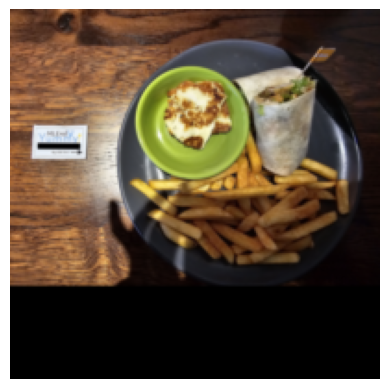

Predicted Label: Rice
True Label: Chips


In [23]:
image_index = 9

input_image = X_test[image_index]

plt.imshow(input_image)
plt.axis('off')
plt.show()

yellow_component = get_yellow_component(input_image)
dissimilarity, correlation = GMLC_features(input_image)

input_features = np.array([yellow_component, dissimilarity, correlation])
input_features_normalized = (input_features - MEAN) / SD

predicted_label = model.predict(input_features_normalized.reshape(1, -1))[0]
predicted_class = 'Chips' if predicted_label == 0 else 'Rice'

true_label = Y_test[image_index]
true_class = 'Chips' if true_label == 0 else 'Rice'

print("Predicted Label:", predicted_class)
print("True Label:", true_class)


We can see that, for the test image which is present at the 9th index is predicted wrong.

We know our model is very bad in terms of its accuracy. To overcome this issue we can find different approaches like feature extraction, which we have already done, but we can try a different approach too. We can also try different approaches like training the model with a different algorithm. We can also use hyperparameter tuning approach to get a better accuracy.

We have so many ways, but let us try doing it by considering a different approach for feature extraction.

### 3. Feature Extraction OR Transformation Stage: Part Two

Here we will be implementing other way of feature extraction.

In [24]:
import cv2
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy

def get_yellow_component(image):
    image = np.clip(image, 0, 255).astype(np.uint8)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([20, 100, 100], dtype=np.uint8)
    upper_yellow = np.array([30, 255, 255], dtype=np.uint8)
    yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
    yellow_component = np.sum(yellow_mask) / 255
    return yellow_component

def GLCM_features(image):
    """
    Calculate GMLC (Gray-Level Co-occurrence Matrix) features from the input image.
    """
    # Convert the image to uint8 type
    image = np.clip(image, 0, 255).astype(np.uint8)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Example: Using dissimilarity and correlation from GLCM
    glcm = graycomatrix(gray_image, [5], [0], symmetric=True, normed=True)
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return dissimilarity, correlation

We have created two functions, the first one is **"get_yellow_component"**. The array of the images is taken as an input by this function. [0,255] is the specified valid range for the pixel values of the input images to be in that range. We have then gathered the hues corresponing to yellow color by specifying the upper and lower bounds of the yellow color in HSV color space. Our yellow_mask is the binary mask which is used to the pixels of the input images that will fall in the specified range. As the specified range is [0,255], we divide the sum of yellow_mask by 255 in order to get the count of yellow pixels.

In the second function **"GLCM_features"**, we have kept the similar approach.

Now we will be defining a function to extract the features.

In [25]:
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Extract features
    yellow_component = get_yellow_component(image)
    dissimilarity, correlation = GMLC_features(image)

    return [yellow_component, dissimilarity, correlation]

In the above function, the input is the path of the image. We will be specifying it later when we will be training the model, but just so you know, the path of the image is nothing but the X_paths defined earlier. The only difference is that we are taking all the paths of all the images. This function is specifically defined to call the other two components that has actually extracted the features.

### 4. Trianing OR Modelling:

We are using **Support Vector Machine** algorithm to train and test our model.

### Methodology:

We will use **SVM** as our training model and determine its accuracy on training and testing datasets, so that we can determine whether the model is good for classification or not.

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def train_model(X_train, Y_train):
    model = SVC()

    # Fit the model on the training data
    model.fit(X_train, Y_train)

    return model

def evaluate_model(model, X_test, Y_test):
    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, predictions)
    return accuracy


def train_accuracy(model, X_train, Y_train):
    # Make predictions on the test set
    predictions = model.predict(X_train)

    # Calculate accuracy
    accuracy = accuracy_score(Y_train, predictions)
    return accuracy

We have defined different functions for training the model, testing accuracy and training accuracy.

Let us train and test our model and note down the training and testing accuracy for the same.

In [27]:
X_train = [extract_features(path) for path in TrainSet['X_paths']]
X_test = [extract_features(path) for path in TestSet['X_paths']]

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Train the model
model = train_model(X_train, TrainSet['Y_encoded'])

# Evaluate the model
accuracy = evaluate_model(model, X_test, TestSet['Y_encoded'])
print("Accuracy:", accuracy)

Accuracy: 0.6551724137931034


Around 65% accuracy, at least we are more that the accuracy of our previous model. Let us now check what will the model predict for the same image that we predicted for earlier.

Predicted Label: Chips | True Label: Chips


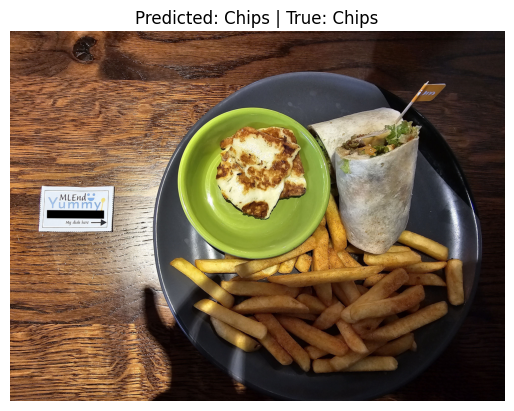

In [28]:
image_index = 9  # Change this to the index of the image you want to predict
input_image_path = TestSet['X_paths'][image_index]
input_features = extract_features(input_image_path)
input_features = np.array(input_features).reshape(1, -1)
predicted_label = model.predict(input_features)[0]
predicted_class = 'Chips' if predicted_label == 0 else 'Rice'

true_label = TestSet['Y_encoded'][image_index]
true_class = 'Chips' if true_label == 0 else 'Rice'

print(f"Predicted Label: {predicted_class} | True Label: {true_class}")

image = cv2.imread(input_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title(f"Predicted: {predicted_class} | True: {true_class}")
plt.axis('off')
plt.show()

**It is predicting correctly!!**

We can say that our second model is predicting better, which we can say by just looking at the accuracy as well.

### **Conclusion:**

You can train and test more models using different algorithms. We can also add new features in the feature extraction part, so that we can acheive more accuracy for both training and testing datasets.